In [59]:
import os
import tarfile
from urllib import request

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [2]:
url = (
    'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'
)

save_path = os.path.join('datasets', 'housing')


def fetch_housing_data(url: str, save_path: str):
    os.makedirs(save_path, exist_ok=True)
    tgz_path = os.path.join(save_path, 'housing.tgz')
    request.urlretrieve(url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=save_path)
    housing_tgz.close()
    
def load_housing_data(path: str):
    csv_path = os.path.join(path, 'housing.csv')
    return pd.read_csv(csv_path)

In [3]:
fetch_housing_data(url, save_path)

In [4]:
housing = load_housing_data(save_path)

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.shape

(20640, 10)

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


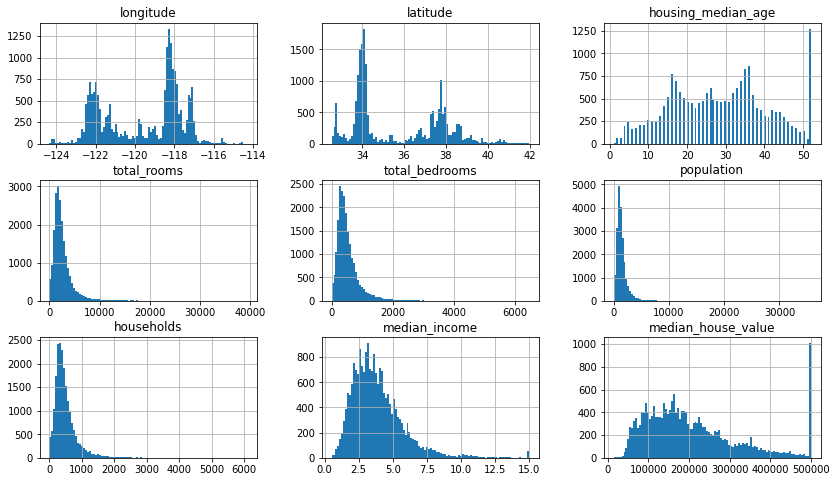

In [9]:
housing.select_dtypes(include='float64').hist(bins=100,figsize=(14,8))
plt.show()

In [10]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3., 4.5, 6., np.inf], labels=[1,2,3,4,5])

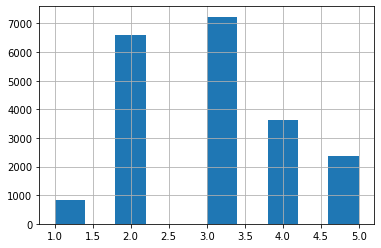

In [11]:
housing['income_cat'].hist()
plt.show()

In [12]:
spl = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)

In [13]:
for train_index, test_index in spl.split(
                                        housing,
                                        housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
train_set, test_set = train_test_split(housing, test_size=.2, random_state=42)

In [15]:
print(f'train_set: {len(train_set)}, test_set: {len(test_set)} ')

train_set: 16512, test_set: 4128 


In [16]:
print(f'strat_train_set: {len(strat_train_set)}, strat_test_set: {len(strat_test_set)} ')

strat_train_set: 16512, strat_test_set: 4128 


In [17]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [18]:
housing2 = strat_train_set.copy()

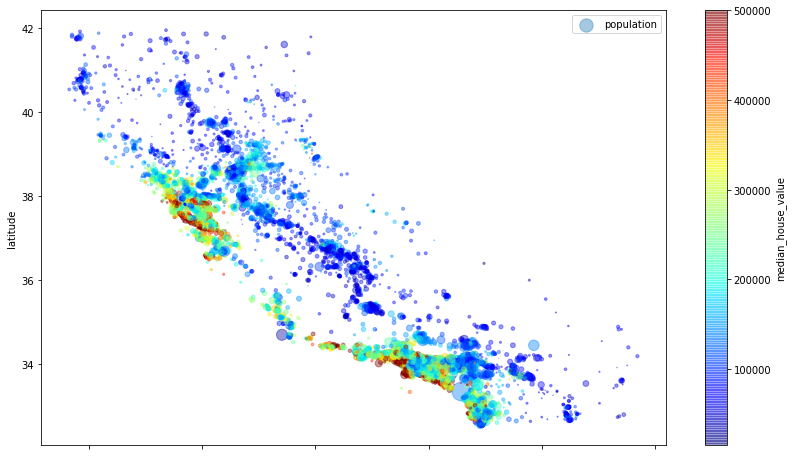

In [19]:
housing2.plot(kind='scatter', x='longitude', y='latitude', alpha=.4,
             s=housing2['population']/100, label='population',
             figsize=(14,8), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

In [20]:
corr_matrix = housing2.corr()

In [21]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [22]:
attrs = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

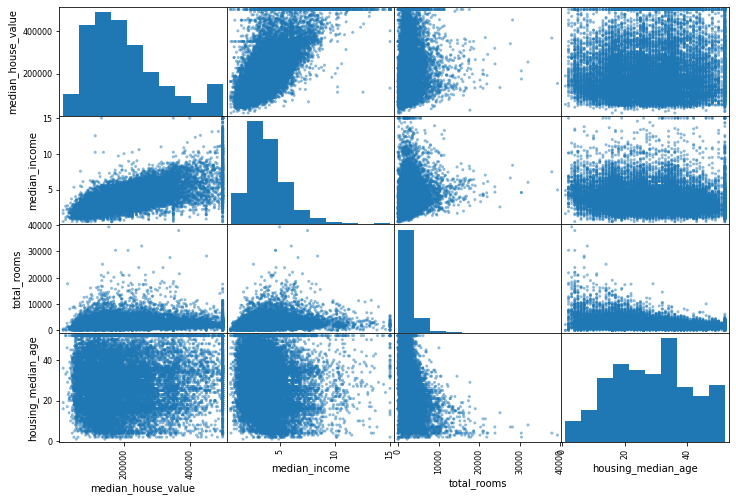

In [23]:
scatter_matrix(housing2[attrs], figsize=(12,8))
plt.show()

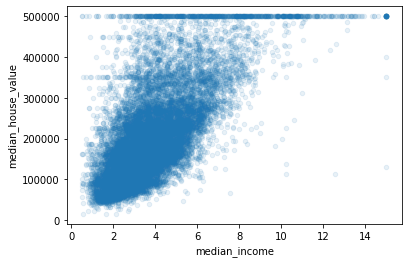

In [24]:
housing2.plot(kind='scatter', x='median_income', y='median_house_value', alpha=.1)
plt.show()

In [25]:
housing2['rooms_per_houshold'] = housing2['total_rooms']/housing2['households']

In [26]:
housing2['bedrooms_per_rooms'] = housing2['total_bedrooms']/housing2['total_rooms']

In [27]:
housing2['population_per_household'] = housing2['population']/housing2['households']

In [28]:
corr_matrix = housing2.corr()

In [29]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_houshold          0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_rooms         -0.259984
Name: median_house_value, dtype: float64

In [37]:
housing3 = strat_train_set.drop('median_house_value', axis=1)

In [38]:
housing3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [39]:
housing3.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [40]:
housing3_num = housing2.drop('ocean_proximity', axis=1)

In [42]:
imputer = SimpleImputer(strategy='median')
imputer.fit(housing3_num)

SimpleImputer(strategy='median')

In [43]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        1.79500000e+05,  5.23228423e+00,  2.03031374e-01,  2.81765270e+00])

In [44]:
X = imputer.transform(housing3_num)

In [46]:
housing3_tr = pd.DataFrame(X, columns=housing3_num.columns, index=housing3_num.index)

In [49]:
housing3_tr.isna().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
rooms_per_houshold          0
bedrooms_per_rooms          0
population_per_household    0
dtype: int64

In [52]:
ordinal_encoder = OrdinalEncoder()

In [56]:
housing3_cat = housing3[['ocean_proximity']]
housing3_cat_encoded = ordinal_encoder.fit_transform(housing3_cat)

In [57]:
housing3_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [58]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [60]:
cat_encoder = OneHotEncoder()

In [64]:
housing3_cat_1hot = cat_encoder.fit_transform(housing3_cat)

In [66]:
housing3_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [68]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin

In [75]:
rooms_ix, bedrooms_ix, population_ix, housholds_ix = 3,4,5,6

In [78]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y = None):
        return self
    
    def transform (self, X, y = None):
        rooms_per_houshold = X[:, bedrooms_ix] / X[:, rooms_ix]
        population_per_houshold = X[:, population_ix] / X[:, housholds_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_houshold, population_per_houshold, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_houshold, population_per_houshold]

In [79]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [83]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [84]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
income_cat              0
dtype: int64

In [85]:
housing3.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [91]:
housing3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [102]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [97]:
num_attribs = list(housing3.select_dtypes(include='float64'))
cat_attribs = ['ocean_proximity']

In [103]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [104]:
housing_prepared = full_pipeline.fit_transform(housing3)

## Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
lin_reg = LinearRegression()

In [108]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

### testing model manually

In [121]:
some_data = housing3.iloc[:5]

In [123]:
some_labels = housing_labels[:5]

In [126]:
some_data_prepared = full_pipeline.transform(some_data)

In [127]:
print('Predict:', lin_reg.predict(some_data_prepared))

Predict: [210563.33661755 318260.76438827 211215.14630977  59114.79474222
 187121.77956263]


In [128]:
print(list(some_labels))

[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [129]:
from sklearn.metrics import mean_squared_error

In [130]:
housing_predictions = lin_reg.predict(housing_prepared)

In [131]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [132]:
lin_rmse = np.sqrt(lin_mse)

In [133]:
print(lin_rmse)

68826.63585095566


## Decision Tree

In [134]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
tree_reg = DecisionTreeRegressor()

In [136]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [137]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

In [138]:
tree_rmse

0.0

In [139]:
from sklearn.model_selection import cross_val_score

In [140]:
scores = cross_val_score(tree_reg,
                         housing_prepared,
                         housing_labels,
                         scoring='neg_mean_squared_error',
                         cv =10)

In [141]:
tree_rmse_scores = np.sqrt(-scores)

In [142]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('std: ', scores.std())

In [143]:
display_scores(tree_rmse_scores)

Scores:  [67476.67823123 68291.59020802 69583.11398222 71187.44686613
 70911.90422568 74823.78641586 71437.88296067 71546.17429668
 73283.75023659 70731.91443645]
Mean:  70927.42418595312
std:  2052.945347456214


In [145]:
lin_scores = cross_val_score(lin_reg,
                             housing_prepared,
                             housing_labels,
                             scoring='neg_mean_squared_error',
                             cv=10)

In [146]:
lin_reg_rmse_scores = np.sqrt(-lin_scores)

In [147]:
display_scores(lin_reg_rmse_scores)

Scores:  [66899.81050358 67175.37517063 70150.13267841 74996.34376617
 67805.64981263 71294.59349397 65186.40759905 68217.48595344
 72578.14406325 67736.06602734]
Mean:  69204.00090684605
std:  2843.4296660883997


## Random Forest

In [148]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
forest_reg = RandomForestRegressor()

In [152]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [153]:
forest_reg_scores = cross_val_score(forest_reg,
                                   housing_prepared,
                                   housing_labels,
                                   scoring='neg_mean_squared_error',
                                   cv=10)

In [154]:
forest_reg_rmse_scores = np.sqrt(-forest_reg_scores)
forest_reg_rmse_scores

array([49933.93706668, 47607.76507595, 50980.93350341, 52628.64435299,
       49954.30464756, 53747.07577713, 49102.93728984, 48543.32077734,
       53138.9120582 , 50551.63993637])

In [155]:
display_scores(forest_reg_rmse_scores)

Scores:  [49933.93706668 47607.76507595 50980.93350341 52628.64435299
 49954.30464756 53747.07577713 49102.93728984 48543.32077734
 53138.9120582  50551.63993637]
Mean:  50618.94704854694
std:  1920.796078806843


In [156]:
import joblib

In [157]:
joblib.dump(lin_reg, 'lin_reg1.pkl')

['lin_reg1.pkl']

In [158]:
lin_reg_loaded = joblib.load('lin_reg1.pkl')

In [159]:
from sklearn.model_selection import GridSearchCV

In [161]:
param_grid = [
    {'n_estimators': [3,10,30],
    'max_features': [2,4,6,8]},
    {'bootstrap': [False],
    'n_estimators': [3,10],
    'max_features': [2,3,4]}]

In [162]:
forest_reg = RandomForestRegressor()

In [165]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

In [166]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [167]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [168]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [169]:
cvres = grid_search.cv_results_

In [170]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print (np.sqrt(-mean_score), params)

65145.268878367504 {'max_features': 2, 'n_estimators': 3}
55571.78481819339 {'max_features': 2, 'n_estimators': 10}
53062.963716451566 {'max_features': 2, 'n_estimators': 30}
60168.28211496316 {'max_features': 4, 'n_estimators': 3}
53184.12279944162 {'max_features': 4, 'n_estimators': 10}
51163.14942969894 {'max_features': 4, 'n_estimators': 30}
60228.93561715767 {'max_features': 6, 'n_estimators': 3}
52589.27809079427 {'max_features': 6, 'n_estimators': 10}
50343.378720514804 {'max_features': 6, 'n_estimators': 30}
59055.413098363504 {'max_features': 8, 'n_estimators': 3}
52918.115855628836 {'max_features': 8, 'n_estimators': 10}
50376.25800755762 {'max_features': 8, 'n_estimators': 30}
62367.99314817049 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54411.655679349446 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60121.1949925021 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53470.477632845395 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [173]:
features_importances = grid_search.best_estimator_.feature_importances_

In [174]:
features_importances

array([7.13988124e-02, 6.76039802e-02, 4.63541137e-02, 1.96698306e-02,
       1.73747694e-02, 1.76907309e-02, 1.71126898e-02, 3.35992620e-01,
       5.53674282e-02, 1.10481286e-01, 7.59757422e-02, 1.47013356e-02,
       1.40270595e-01, 1.13121921e-04, 2.62348273e-03, 7.26946111e-03])

In [175]:
extra_attribs = ['rooms_per_hhols', 'pop_per_hhold', 'bedrooms_per_room']

In [177]:
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(features_importances, attributes), reverse=True)

[(0.3359926203115371, 'median_income'),
 (0.14027059525270272, 'INLAND'),
 (0.11048128579473748, 'pop_per_hhold'),
 (0.07597574219493898, 'bedrooms_per_room'),
 (0.0713988124025716, 'longitude'),
 (0.06760398019141615, 'latitude'),
 (0.05536742818385162, 'rooms_per_hhols'),
 (0.04635411366031978, 'housing_median_age'),
 (0.01966983060042103, 'total_rooms'),
 (0.01769073094920792, 'population'),
 (0.017374769354417802, 'total_bedrooms'),
 (0.017112689775153945, 'households'),
 (0.014701335558686905, '<1H OCEAN'),
 (0.007269461113861575, 'NEAR OCEAN'),
 (0.002623482734744341, 'NEAR BAY'),
 (0.00011312192143101957, 'ISLAND')]

In [178]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_prediction = final_model.predict(X_test_prepared)

In [179]:
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [180]:
final_rmse

48453.21473929312

In [171]:
from scipy import stats

In [182]:
confidence = 0.95
squared_errors = (final_prediction - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([46445.17413781, 50381.28458518])